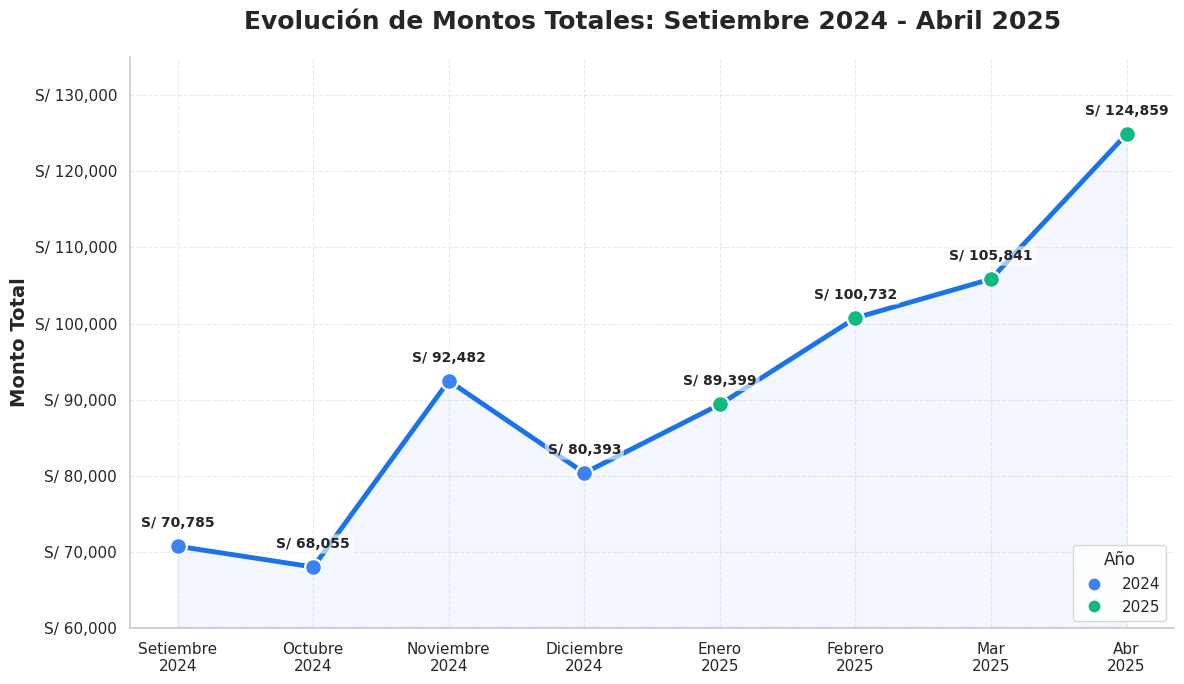

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import StrMethodFormatter

# Set the style
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Create data for the graph
months = ['Setiembre', 'Octubre', 'Noviembre', 'Diciembre', 'Enero', 'Febrero', 'Mar', 'Abr']
totals = [70785, 68055, 92482, 80393, 89399, 100732, 105841, 124859]
years = ['2024', '2024', '2024', '2024', '2025', '2025', '2025', '2025']

# Create DataFrame
data = pd.DataFrame({
    'Mes': months,
    'Total': totals,
    'Año': years
})

# Create an ordered numerical representation for proper sorting
month_order = {
    'Setiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12,
    'Enero': 1, 'Febrero': 2, 'Mar': 3, 'Abr': 4
}
data['month_num'] = data['Mes'].map(month_order)
data['year_num'] = data['Año'].astype(int)
data['sort_key'] = data['year_num'] * 100 + data['month_num']

# Sort the data by this numerical representation
data = data.sort_values('sort_key')

# Create month-year labels for better x-axis
data['Mes_Año'] = data['Mes'] + '\n' + data['Año']

# Create a refined color palette
colors = {"2024": "#3b82f6", "2025": "#10b981"}

# Plot the data with slightly improved aesthetics
plt.figure(figsize=(12, 7))  # Increase height for better proportions

# Create a single continuous line plot
ax = sns.lineplot(
    data=data, 
    x='Mes_Año', 
    y='Total',
    marker='o',
    markersize=12,
    linewidth=3.5,
    color="#1a73e8",  # Single color for the line
    markeredgecolor='white',
    markeredgewidth=1.5
)

# Colorize markers by year (optional)
for i, row in data.reset_index().iterrows():
    plt.plot(i, row['Total'], 'o', 
             markersize=12, 
             markeredgecolor='white',
             markeredgewidth=1.5,
             color=colors[row['Año']])

# Add text labels for each point with improved formatting
for i, row in data.reset_index().iterrows():
    plt.text(i, row['Total'] + 2500, f'S/ {row["Total"]:,}', 
             ha='center', fontweight='bold', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.2'))

# Set y-axis limits and format
plt.ylim(60000, 135000)
ax.yaxis.set_major_formatter(StrMethodFormatter('S/ {x:,.0f}'))

# Add title and labels with refined styling
plt.title('Evolución de Montos Totales: Setiembre 2024 - Abril 2025', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('', fontsize=12)  # Empty as we're using Mes_Año labels
plt.ylabel('Monto Total', fontsize=14, fontweight='bold')

# Add grid with refined appearance
plt.grid(True, linestyle='--', alpha=0.4, linewidth=0.8)

# No need to rotate labels since we're using newlines in Mes_Año
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add a horizontal line at the minimum value for reference
plt.axhline(y=60000, color='gray', linestyle='--', alpha=0.3)

# Update legend for the custom points
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors['2024'], 
              markersize=10, markeredgecolor='white', markeredgewidth=1.5, label='2024'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors['2025'], 
              markersize=10, markeredgecolor='white', markeredgewidth=1.5, label='2025')
]
plt.legend(handles=handles, title='Año', loc='lower right', frameon=True, 
           fontsize=11, title_fontsize=12,
           framealpha=0.9, edgecolor='lightgray')

# Remove top and right spines for cleaner look
sns.despine(left=False, bottom=False)

# Add subtle shading under the entire line
ax.fill_between(
    range(len(data)), 
    60000, 
    data['Total'].values, 
    color="#1a73e8", 
    alpha=0.05
)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

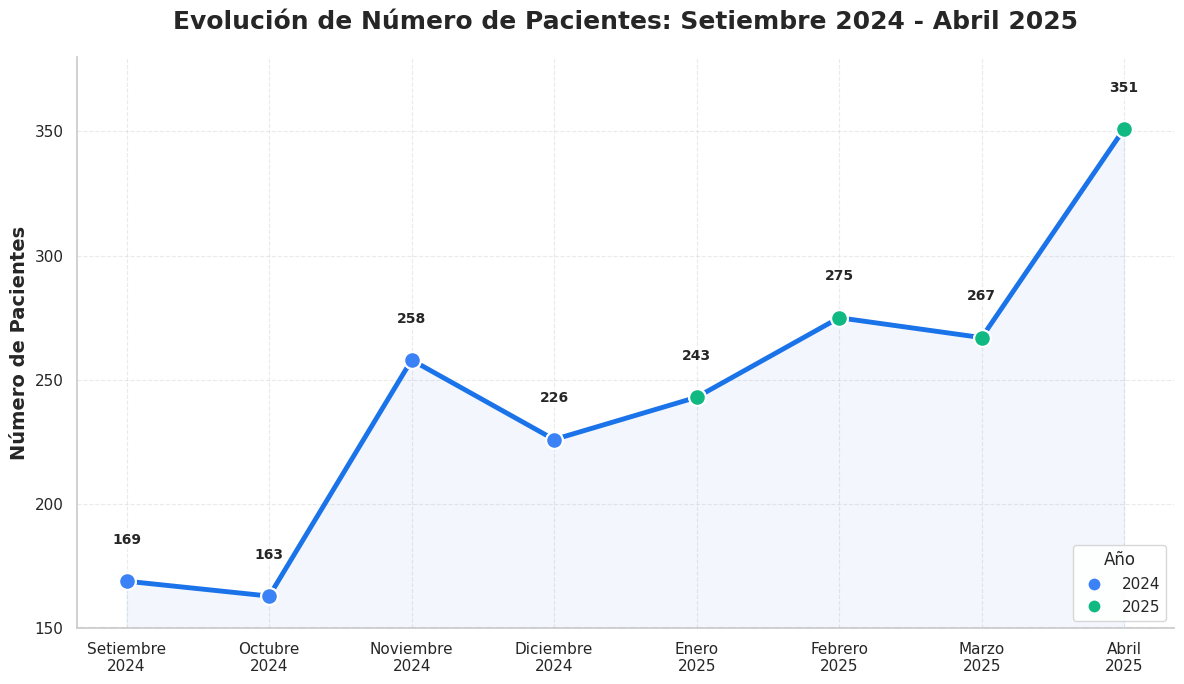

In [7]:
# Create data for the patient count graph
months = ['Setiembre', 'Octubre', 'Noviembre', 'Diciembre', 'Enero', 'Febrero', 'Marzo', 'Abril']
totals = [169, 163, 258, 226, 243, 275, 267, 351]
years = ['2024', '2024', '2024', '2024', '2025', '2025', '2025', '2025']

# Create DataFrame
patients_data = pd.DataFrame({
    'Mes': months,
    'Total': totals,
    'Año': years
})

# Create an ordered numerical representation for proper sorting
month_order = {
    'Setiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12,
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4
}
patients_data['month_num'] = patients_data['Mes'].map(month_order)
patients_data['year_num'] = patients_data['Año'].astype(int)
patients_data['sort_key'] = patients_data['year_num'] * 100 + patients_data['month_num']

# Sort the data by this numerical representation
patients_data = patients_data.sort_values('sort_key')

# Create month-year labels for better x-axis
patients_data['Mes_Año'] = patients_data['Mes'] + '\n' + patients_data['Año']

# Create a refined color palette
patient_colors = {"2024": "#3b82f6", "2025": "#10b981"}

# Plot the data with slightly improved aesthetics
plt.figure(figsize=(12, 7))

# Create a single continuous line plot
ax = sns.lineplot(
    data=patients_data, 
    x='Mes_Año', 
    y='Total',
    marker='o',
    markersize=12,
    linewidth=3.5,
    color="#1a73e8",
    markeredgecolor='white',
    markeredgewidth=1.5
)

# Colorize markers by year
for i, row in patients_data.reset_index().iterrows():
    plt.plot(i, row['Total'], 'o', 
             markersize=12, 
             markeredgecolor='white',
             markeredgewidth=1.5,
             color=patient_colors[row['Año']])

# Add text labels for each point with improved formatting
for i, row in patients_data.reset_index().iterrows():
    plt.text(i, row['Total'] + 15, f'{row["Total"]}', 
             ha='center', fontweight='bold', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.2'))

# Set y-axis limits and format
plt.ylim(150, 380)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Add title and labels with refined styling
plt.title('Evolución de Número de Pacientes: Setiembre 2024 - Abril 2025', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=14, fontweight='bold')

# Add grid with refined appearance
plt.grid(True, linestyle='--', alpha=0.4, linewidth=0.8)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add a horizontal line at the minimum value for reference
plt.axhline(y=150, color='gray', linestyle='--', alpha=0.3)

# Update legend for the custom points
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=patient_colors['2024'], 
              markersize=10, markeredgecolor='white', markeredgewidth=1.5, label='2024'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=patient_colors['2025'], 
              markersize=10, markeredgecolor='white', markeredgewidth=1.5, label='2025')
]
plt.legend(handles=handles, title='Año', loc='lower right', frameon=True, 
           fontsize=11, title_fontsize=12,
           framealpha=0.9, edgecolor='lightgray')

# Remove top and right spines for cleaner look
sns.despine(left=False, bottom=False)

# Add subtle shading under the entire line
ax.fill_between(
    range(len(patients_data)), 
    150, 
    patients_data['Total'].values, 
    color="#1a73e8", 
    alpha=0.05
)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Create data for the patient count graph
months = ['Octubre', 'Noviembre', 'Diciembre', 'Enero', 'Febrero', 'Marzo', 'Abril']
totals = [163, 258, 226, 243, 275, 267, 351]
years = ['2024', '2024', '2024', '2025', '2025', '2025', '2025']

# Create DataFrame
patients_data = pd.DataFrame({
    'Mes': months,
    'Total': totals,
    'Año': years
})

# Create an ordered numerical representation for proper sorting
month_order = {
    'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12,
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4
}
patients_data['month_num'] = patients_data['Mes'].map(month_order)
patients_data['year_num'] = patients_data['Año'].astype(int)
patients_data['sort_key'] = patients_data['year_num'] * 100 + patients_data['month_num']

# Sort the data by this numerical representation
patients_data = patients_data.sort_values('sort_key')

# Create month-year labels for better x-axis
patients_data['Mes_Año'] = patients_data['Mes'] + '\n' + patients_data['Año']

# Create a refined color palette
patient_colors = {"2024": "#3b82f6", "2025": "#10b981"}

# Plot the data with slightly improved aesthetics
plt.figure(figsize=(12, 7))

# Create a single continuous line plot
ax = sns.lineplot(
    data=patients_data, 
    x='Mes_Año', 
    y='Total',
    marker='o',
    markersize=12,
    linewidth=3.5,
    color="#1a73e8",
    markeredgecolor='white',
    markeredgewidth=1.5
)

# Colorize markers by year
for i, row in patients_data.reset_index().iterrows():
    plt.plot(i, row['Total'], 'o', 
             markersize=12, 
             markeredgecolor='white',
             markeredgewidth=1.5,
             color=patient_colors[row['Año']])

# Add text labels for each point with improved formatting
for i, row in patients_data.reset_index().iterrows():
    plt.text(i, row['Total'] + 15, f'{row["Total"]}', 
             ha='center', fontweight='bold', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.2'))

# Set y-axis limits and format
plt.ylim(150, 380)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Add title and labels with refined styling
plt.title('Evolución de Número de Pacientes: Octubre 2024 - Abril 2025', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=14, fontweight='bold')

# Add grid with refined appearance
plt.grid(True, linestyle='--', alpha=0.4, linewidth=0.8)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add a horizontal line at the minimum value for reference
plt.axhline(y=150, color='gray', linestyle='--', alpha=0.3)

# Update legend for the custom points
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=patient_colors['2024'], 
              markersize=10, markeredgecolor='white', markeredgewidth=1.5, label='2024'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=patient_colors['2025'], 
              markersize=10, markeredgecolor='white', markeredgewidth=1.5, label='2025')
]
plt.legend(handles=handles, title='Año', loc='lower right', frameon=True, 
           fontsize=11, title_fontsize=12,
           framealpha=0.9, edgecolor='lightgray')

# Remove top and right spines for cleaner look
sns.despine(left=False, bottom=False)

# Add subtle shading under the entire line
ax.fill_between(
    range(len(patients_data)), 
    150, 
    patients_data['Total'].values, 
    color="#1a73e8", 
    alpha=0.05
)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Create data for the patient count graph
months = ['Octubre', 'Noviembre', 'Diciembre', 'Enero', 'Febrero', 'Marzo', 'Abril']
totals = [163, 258, 226, 243, 275, 267, 351]
years = ['2024', '2024', '2024', '2025', '2025', '2025', '2025']

# Create DataFrame
patients_data = pd.DataFrame({
    'Mes': months,
    'Total': totals,
    'Año': years
})

# Create an ordered numerical representation for proper sorting
month_order = {
    'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12,
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4
}
patients_data['month_num'] = patients_data['Mes'].map(month_order)
patients_data['year_num'] = patients_data['Año'].astype(int)
patients_data['sort_key'] = patients_data['year_num'] * 100 + patients_data['month_num']

# Sort the data by this numerical representation
patients_data = patients_data.sort_values('sort_key')

# Create month-year labels for better x-axis
patients_data['Mes_Año'] = patients_data['Mes'] + '\n' + patients_data['Año']

# Create a refined color palette
patient_colors = {"2024": "#3b82f6", "2025": "#10b981"}

# Plot the data with slightly improved aesthetics
plt.figure(figsize=(12, 7))

# Create a single continuous line plot
ax = sns.lineplot(
    data=patients_data, 
    x='Mes_Año', 
    y='Total',
    marker='o',
    markersize=12,
    linewidth=3.5,
    color="#1a73e8",
    markeredgecolor='white',
    markeredgewidth=1.5
)

# Colorize markers by year
for i, row in patients_data.reset_index().iterrows():
    plt.plot(i, row['Total'], 'o', 
             markersize=12, 
             markeredgecolor='white',
             markeredgewidth=1.5,
             color=patient_colors[row['Año']])

# Add text labels for each point with improved formatting
for i, row in patients_data.reset_index().iterrows():
    plt.text(i, row['Total'] + 15, f'{row["Total"]}', 
             ha='center', fontweight='bold', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.2'))

# Set y-axis limits and format
plt.ylim(150, 380)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Add title and labels with refined styling
plt.title('Evolución de Número de Pacientes: Octubre 2024 - Abril 2025', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=14, fontweight='bold')

# Add grid with refined appearance
plt.grid(True, linestyle='--', alpha=0.4, linewidth=0.8)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add a horizontal line at the minimum value for reference
plt.axhline(y=150, color='gray', linestyle='--', alpha=0.3)

# Update legend for the custom points
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=patient_colors['2024'], 
              markersize=10, markeredgecolor='white', markeredgewidth=1.5, label='2024'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=patient_colors['2025'], 
              markersize=10, markeredgecolor='white', markeredgewidth=1.5, label='2025')
]
plt.legend(handles=handles, title='Año', loc='lower right', frameon=True, 
           fontsize=11, title_fontsize=12,
           framealpha=0.9, edgecolor='lightgray')

# Remove top and right spines for cleaner look
sns.despine(left=False, bottom=False)

# Add subtle shading under the entire line
ax.fill_between(
    range(len(patients_data)), 
    150, 
    patients_data['Total'].values, 
    color="#1a73e8", 
    alpha=0.05
)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()